In [3]:
# importing libraries
from time import time
import multiprocessing
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob
import skimage
import torch
import SimpleITK as sitk
import skimage, torch, torchvision
import torchxrayvision as xrv
import torchvision
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import random
import logging
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,auc,accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from keras.models import load_model
from tensorflow import keras
from sklearn.model_selection import train_test_split

2023-08-24 22:50:58.227936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
def AUC_ROC_Binary(y_true,y_score):
    y_true=y_true.reshape((-1,1))
    y_score=y_score.reshape((-1,1))
    fpr, tpr, thresholds = roc_curve(y_true, y_score,pos_label=1)
    score_value = roc_auc_score(y_true=y_true, y_score=y_score)
    plt.figure(dpi=150)
    plt.plot(fpr, tpr,label="Male (class 1) vs Female (class 0) \n (AUC={:.2f})".format(score_value))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC for the Prediction Gender (Male vs Female)')
    plt.plot(y_score,y_score,'--k')
    plt.grid(which='both')
    plt.legend()
    plt.show()

def AUC_Precision_Recall(y_true,y_score):
    y_true=y_true.reshape((-1,1))
    y_score=y_score.reshape((-1,1))
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    plt.figure(dpi=150)
    auc_score = auc(y=precision, x=recall)
    # ,label="White vs African-American/Asian \n (AUC={:.2f})".format(score_value)
    plt.plot(recall[::5],precision[::5],label="Male vs Female \n (precision-recall AUC={:.2f})".format(auc_score))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('AUC-ROC for the Prediction of Gender (Male vs Female)')
    plt.grid(which='both')
    plt.legend()
    plt.show()

def prob2categ(y_true,y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    gmeans = np.sqrt(tpr * (1-fpr))
    return gmeans[np.argmax(gmeans)]



420/420 [==============================] - 1s 1ms/step


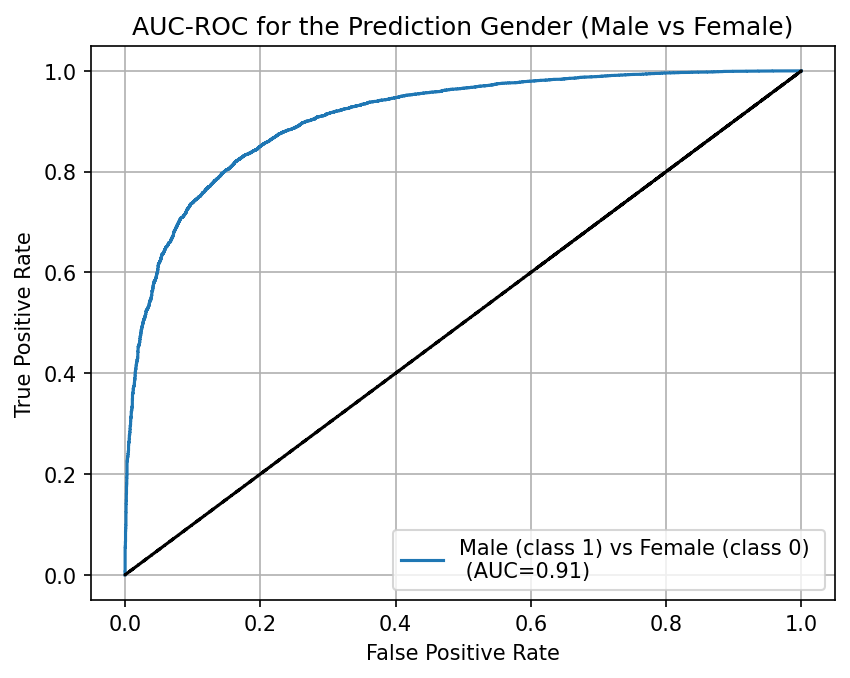

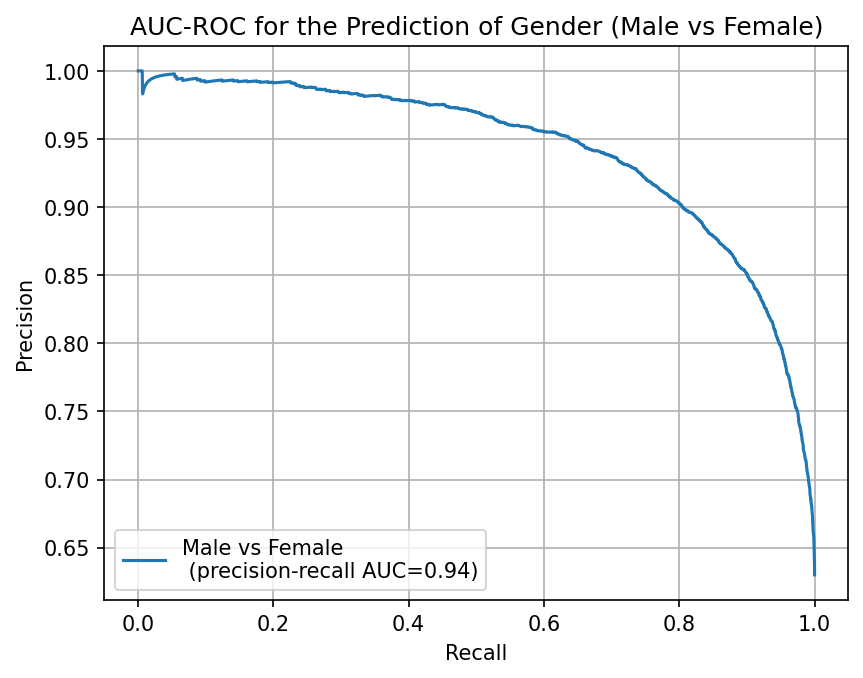

The optimum Threshold is: 0.83
              precision    recall  f1-score   support

         0.0       0.61      0.94      0.74      4961
         1.0       0.95      0.65      0.77      8448

    accuracy                           0.76     13409
   macro avg       0.78      0.79      0.76     13409
weighted avg       0.82      0.76      0.76     13409

[[4663  298]
 [2962 5486]]


In [5]:
name = 'mimic_sex_full_'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_mimic_total = test_data['x_test']
y_mimic_total = test_data['y_test']
mask_mimic_total = test_data['mask_excluded']
model_mimic_total = load_model(name + '_mdl.h5')
y_predict_mimic_total = model_mimic_total.predict(x_mimic_total[:,mask_mimic_total])
AUC_ROC_Binary(y_true=y_mimic_total,y_score=y_predict_mimic_total)
AUC_Precision_Recall(y_true=y_mimic_total,y_score=y_predict_mimic_total)
threshold = prob2categ(y_mimic_total,y_predict_mimic_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_mimic_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_mimic_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_mimic_total, y_pred=class_pred)
print(cm)

420/420 [==============================] - 0s 812us/step


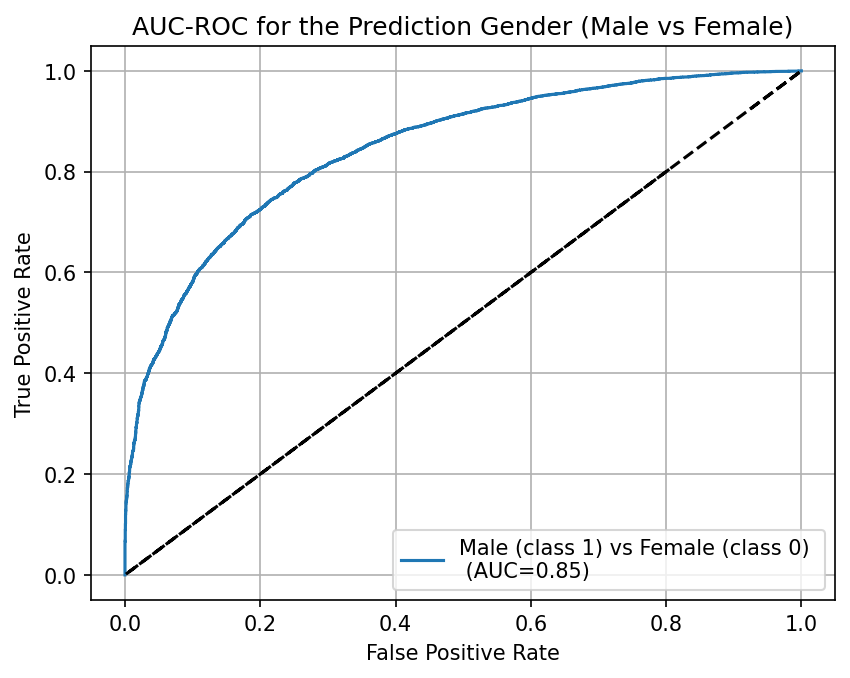

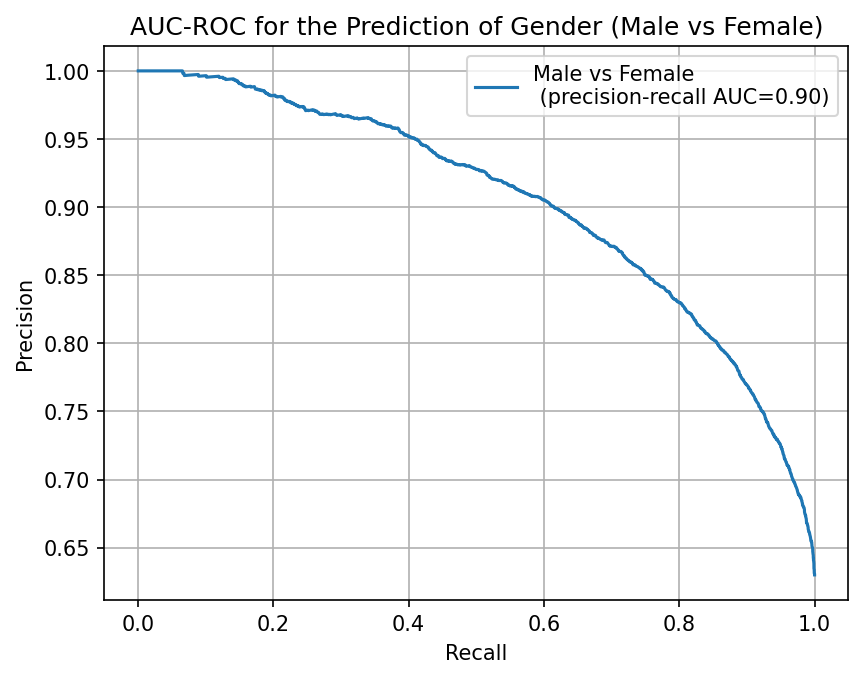

The optimum Threshold is: 0.76
              precision    recall  f1-score   support

         0.0       0.55      0.91      0.68      4961
         1.0       0.92      0.56      0.69      8448

    accuracy                           0.69     13409
   macro avg       0.73      0.73      0.69     13409
weighted avg       0.78      0.69      0.69     13409

[[4526  435]
 [3759 4689]]


In [7]:
name = 'mimic_sex_segments_segment_0__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_mimic_seg_0 = test_data['x_test']
y_mimic_seg_0 = test_data['y_test']
mask_mimic_seg_0 = test_data['mask_excluded']
model_mimic_seg_0 = load_model(name + '_mdl.h5')
y_predict_mimic_seg_0 = model_mimic_seg_0.predict(x_mimic_seg_0[:,mask_mimic_seg_0])
AUC_ROC_Binary(y_true=y_mimic_seg_0,y_score=y_predict_mimic_seg_0)
AUC_Precision_Recall(y_true=y_mimic_seg_0,y_score=y_predict_mimic_seg_0)
threshold = prob2categ(y_mimic_seg_0,y_predict_mimic_seg_0)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_mimic_seg_0.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_mimic_seg_0, y_pred=class_pred))
cm = confusion_matrix(y_true=y_mimic_seg_0, y_pred=class_pred)
print(cm)

420/420 [==============================] - 0s 777us/step


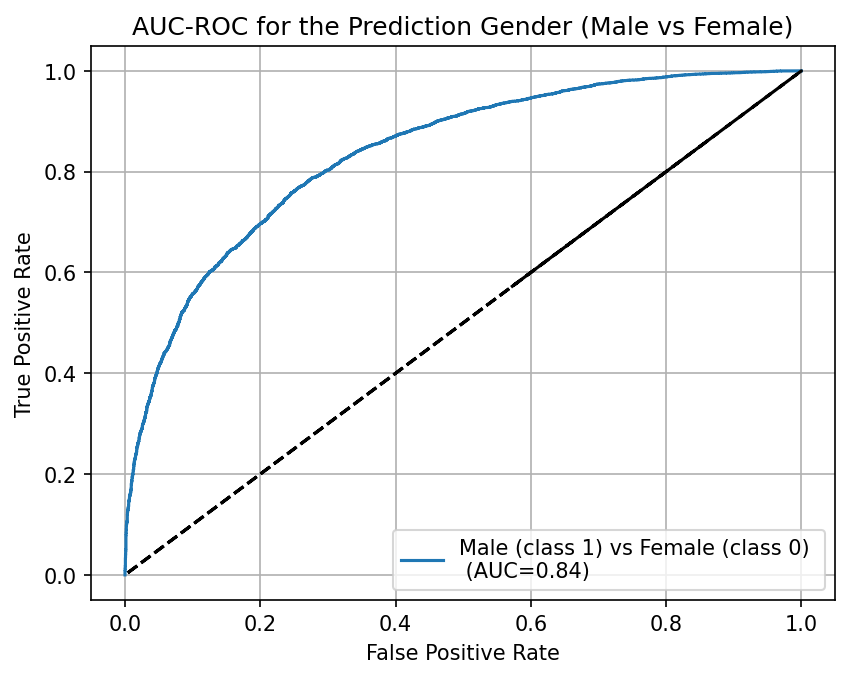

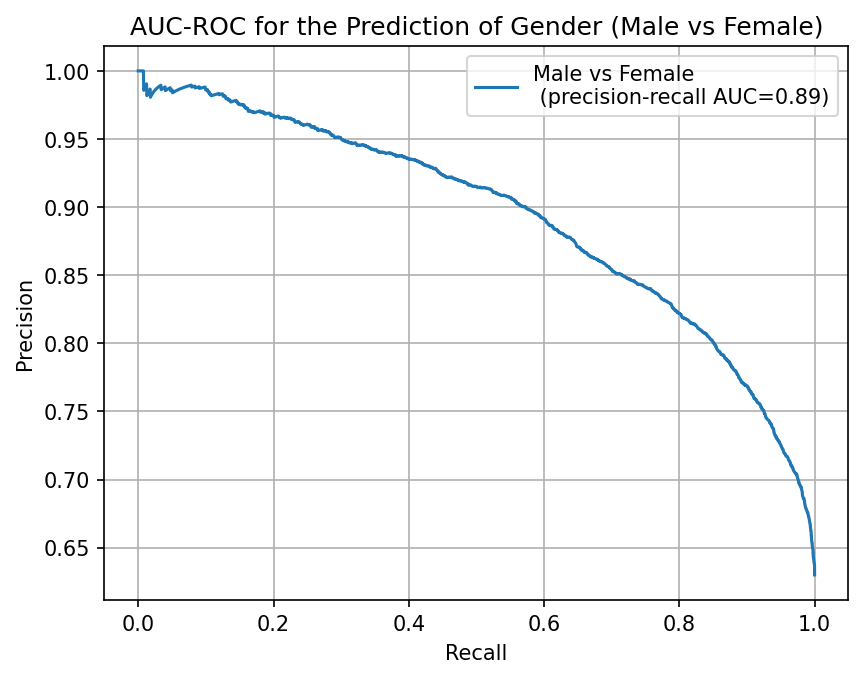

The optimum Threshold is: 0.76
              precision    recall  f1-score   support

         0.0       0.53      0.91      0.67      4961
         1.0       0.91      0.53      0.67      8448

    accuracy                           0.67     13409
   macro avg       0.72      0.72      0.67     13409
weighted avg       0.77      0.67      0.67     13409

[[4514  447]
 [3958 4490]]


In [8]:
name = 'mimic_sex_segments_segment_1__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_mimic_seg_1 = test_data['x_test']
y_mimic_seg_1 = test_data['y_test']
mask_mimic_seg_1 = test_data['mask_excluded']
model_mimic_seg_1 = load_model(name + '_mdl.h5')
y_predict_mimic_seg_1 = model_mimic_seg_1.predict(x_mimic_seg_1[:,mask_mimic_seg_1])
AUC_ROC_Binary(y_true=y_mimic_seg_1,y_score=y_predict_mimic_seg_1)
AUC_Precision_Recall(y_true=y_mimic_seg_1,y_score=y_predict_mimic_seg_1)
threshold = prob2categ(y_mimic_seg_1,y_predict_mimic_seg_1)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_mimic_seg_1.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_mimic_seg_1, y_pred=class_pred))
cm = confusion_matrix(y_true=y_mimic_seg_1, y_pred=class_pred)
print(cm)

420/420 [==============================] - 0s 846us/step


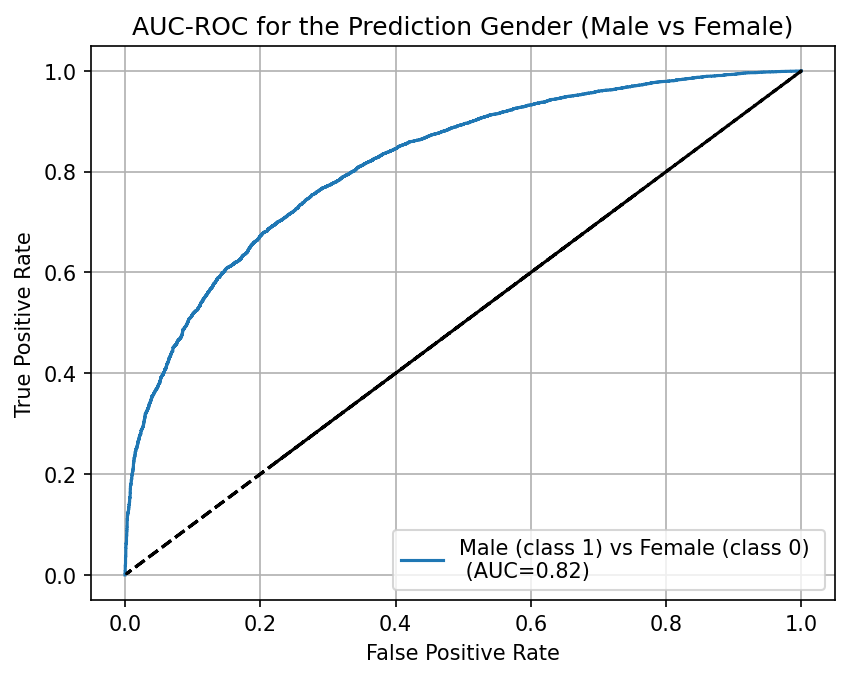

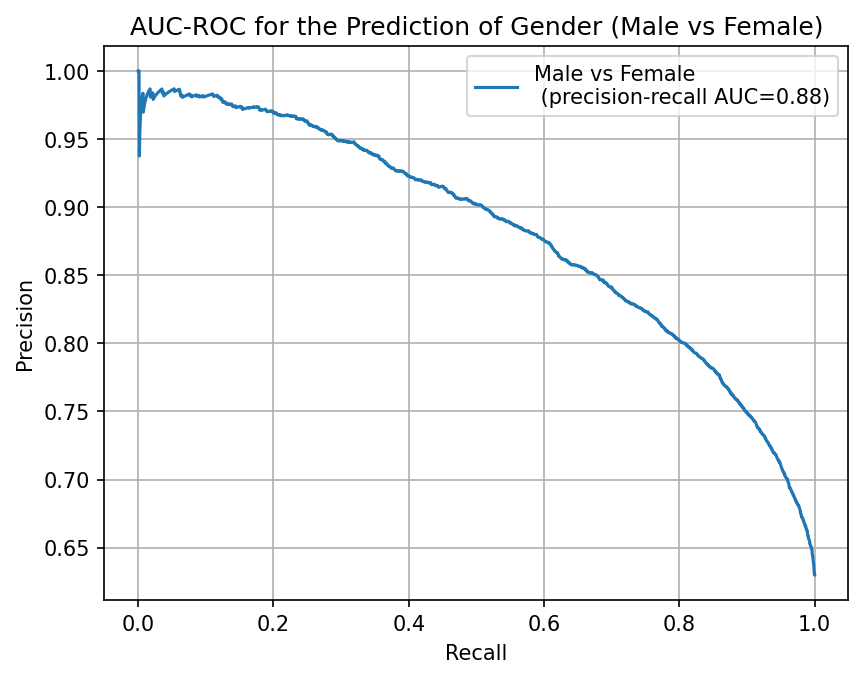

The optimum Threshold is: 0.74
              precision    recall  f1-score   support

         0.0       0.52      0.90      0.66      4961
         1.0       0.90      0.51      0.65      8448

    accuracy                           0.66     13409
   macro avg       0.71      0.71      0.65     13409
weighted avg       0.76      0.66      0.65     13409

[[4489  472]
 [4154 4294]]


In [11]:
name = 'mimic_sex_segments_segment_2__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_mimic_seg_2 = test_data['x_test']
y_mimic_seg_2 = test_data['y_test']
mask_mimic_seg_2 = test_data['mask_excluded']
model_mimic_seg_2 = load_model(name + '_mdl.h5')
y_predict_mimic_seg_2 = model_mimic_seg_2.predict(x_mimic_seg_2[:,mask_mimic_seg_2])
AUC_ROC_Binary(y_true=y_mimic_seg_2,y_score=y_predict_mimic_seg_2)
AUC_Precision_Recall(y_true=y_mimic_seg_2,y_score=y_predict_mimic_seg_2)
threshold = prob2categ(y_mimic_seg_2,y_predict_mimic_seg_2)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_mimic_seg_2.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_mimic_seg_2, y_pred=class_pred))
cm = confusion_matrix(y_true=y_mimic_seg_2, y_pred=class_pred)
print(cm)

420/420 [==============================] - 0s 1ms/step


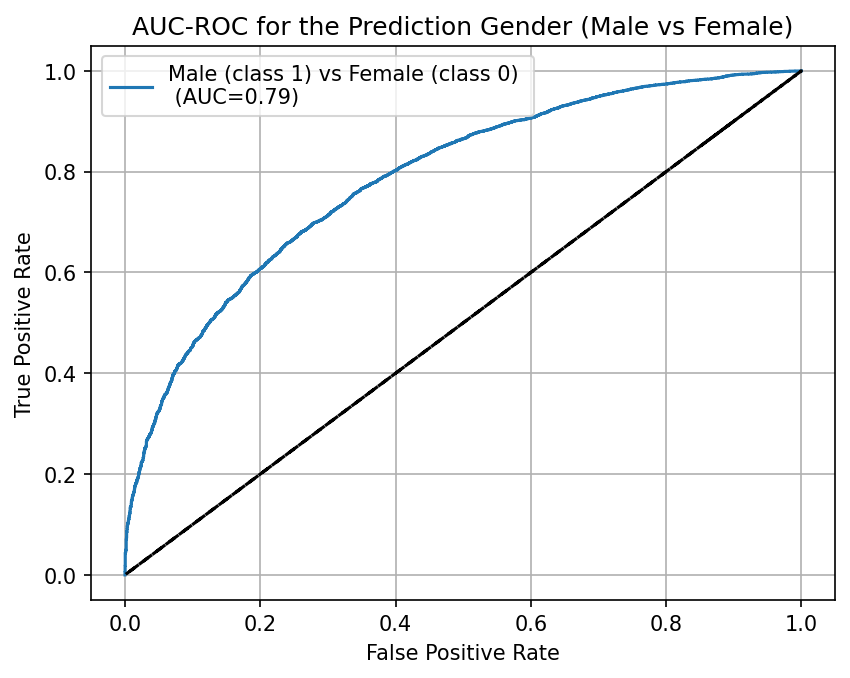

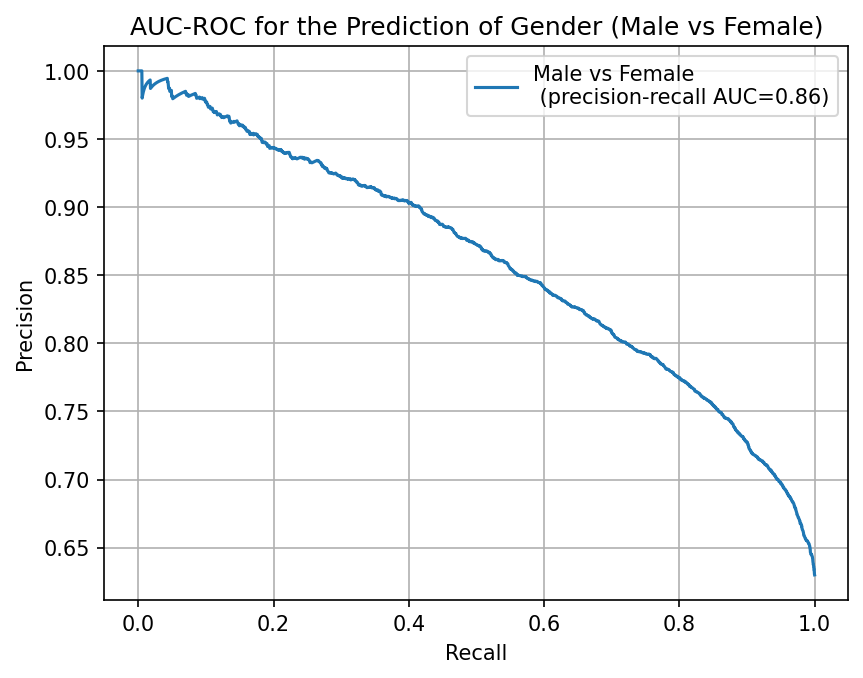

The optimum Threshold is: 0.71
              precision    recall  f1-score   support

         0.0       0.50      0.89      0.64      4961
         1.0       0.88      0.48      0.62      8448

    accuracy                           0.63     13409
   macro avg       0.69      0.68      0.63     13409
weighted avg       0.74      0.63      0.63     13409

[[4398  563]
 [4417 4031]]


In [10]:
name = 'mimic_sex_segments_segment_3__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_mimic_seg_3 = test_data['x_test']
y_mimic_seg_3 = test_data['y_test']
mask_mimic_seg_3 = test_data['mask_excluded']
model_mimic_seg_3 = load_model(name + '_mdl.h5')
y_predict_mimic_seg_3 = model_mimic_seg_3.predict(x_mimic_seg_3[:,mask_mimic_seg_3])
AUC_ROC_Binary(y_true=y_mimic_seg_3,y_score=y_predict_mimic_seg_3)
AUC_Precision_Recall(y_true=y_mimic_seg_3,y_score=y_predict_mimic_seg_3)
threshold = prob2categ(y_mimic_seg_3,y_predict_mimic_seg_3)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_mimic_seg_3.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_mimic_seg_3, y_pred=class_pred))
cm = confusion_matrix(y_true=y_mimic_seg_3, y_pred=class_pred)
print(cm)